# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
wine = pd.read_csv('data/train.csv')

In [3]:
wine.sample(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
92,92,6,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,red
4598,4598,7,7.5,0.31,0.24,7.1,0.031,28.0,141.0,0.99397,3.16,0.38,10.6,white
4073,4073,5,6.6,0.64,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,red
194,194,7,7.0,0.60,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,red
5118,5118,6,7.4,0.18,0.27,1.3,0.048,26.0,105.0,0.99400,3.52,0.66,10.6,white


index는 제거하고 종속변수인 quality는 분리한다.

In [4]:
# quality = wine.iloc[:, 1]
wine.drop(columns=['index'], inplace = True)

# EDA

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


info로 확인한 결과 범주형 데이터가 하나 있으므로 one-hot-encoding 한다.

**one hot encoding**

In [6]:
wine_copy = wine.copy()
wine_copy = pd.get_dummies(wine_copy, columns=['type'])
wine = wine_copy 

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type_red              5497 non-null   uint8  
 13  type_white            5497 non-null   uint8  
dtypes: float64(11), int64(1), uint8(2)
memory usage: 526.2 KB


one hot encoding 완료

**visualization**

<AxesSubplot:>

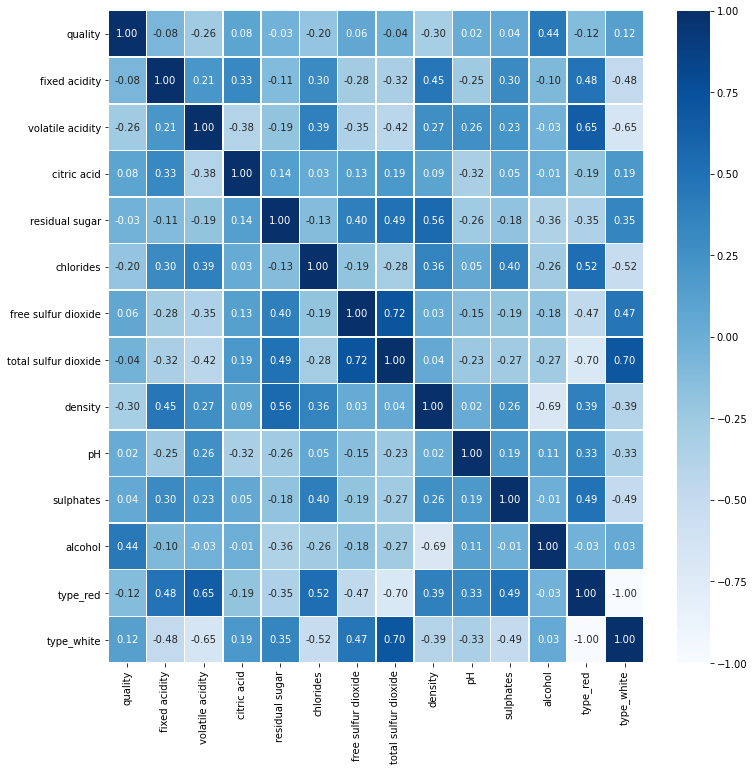

In [8]:
# dacon : 상관관계
plt.figure(figsize=(12,12))
sns.heatmap(data = wine.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
# # dacon : 각 변수별 분포 
# plt.figure(figsize=(12,12))
# for i in range(1,14):
#     plt.subplot(4, 4, i)
#     sns.distplot(wine.iloc[:,i])
# plt.tight_layout()
# plt.show()

**pre-processing**

In [10]:
wine.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405,0.756595
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177,0.429177
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,1.000000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000,1.000000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000



- residual sugar : 0.6 ~ 65.8
- free sulfur dioxide : 1.0 ~ 289.0
- total sulfur dioxide : 6.0 ~ 440.0

**Min-Max Scaling**

In [11]:
wine_minmax_norm = (wine - wine.min()) / (wine.max()-wine.min())
wine_minmax_norm.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,0.469832,0.281828,0.172108,0.191893,0.074204,0.077884,0.102145,0.252457,0.145814,0.377560,0.174452,0.363032,0.243405,0.756595
std,0.145052,0.106411,0.108816,0.087412,0.072955,0.057659,0.061368,0.129696,0.058105,0.126546,0.083930,0.173119,0.429177,0.429177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.214876,0.100000,0.150602,0.018405,0.048253,0.055556,0.165899,0.100058,0.291339,0.117978,0.217391,0.000000,1.000000
50%,0.500000,0.264463,0.140000,0.186747,0.036810,0.063228,0.097222,0.258065,0.148255,0.370079,0.162921,0.333333,0.000000,1.000000
75%,0.500000,0.322314,0.213333,0.234940,0.115031,0.091514,0.138889,0.343318,0.189319,0.456693,0.213483,0.478261,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**shuffle**

In [12]:
wine_minmax_shuffle = wine_minmax_norm.sample(frac=1)
wine_minmax_shuffle.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
4624,0.500000,0.289256,0.383333,0.120482,0.147239,0.103161,0.093750,0.474654,0.192597,0.173228,0.202247,0.173913,0.0,1.0
4625,0.333333,0.347107,0.293333,0.018072,0.016871,0.101498,0.031250,0.066820,0.166570,0.472441,0.196629,0.289855,1.0,0.0
3654,0.333333,0.214876,0.153333,0.186747,0.188650,0.059900,0.187500,0.357143,0.160979,0.220472,0.207865,0.318841,0.0,1.0
1920,0.666667,0.223140,0.066667,0.198795,0.113497,0.069884,0.052083,0.288018,0.181029,0.425197,0.123596,0.101449,0.0,1.0
2035,0.666667,0.239669,0.133333,0.204819,0.127301,0.064892,0.107639,0.241935,0.143436,0.401575,0.179775,0.434783,0.0,1.0


**hyper params**

In [13]:
train_ratio = 0.9
test_begin_index = int(wine.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  4947


**data split**

In [14]:
input_cnt = 13
output_cnt = 1

In [15]:
train_data = wine_minmax_shuffle[:test_begin_index]
test_data = wine_minmax_shuffle[test_begin_index:]

print('train shape : ', train_data.shape)
print('test shape : ', test_data.shape)

train shape :  (4947, 14)
test shape :  (550, 14)


In [16]:
train_Y, train_X = train_data.iloc[:, :output_cnt], train_data.iloc[:, output_cnt:]
test_Y, test_X = test_data.iloc[:, :output_cnt], test_data.iloc[:, output_cnt:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(4947, 13)
(4947, 1)
(550, 13)
(550, 1)


### Modeling (1)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='elu', input_shape= (input_cnt, )),
    tf.keras.layers.Dense(units=24, activation='elu'),
    tf.keras.layers.Dense(units=36, activation='elu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_7 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                370       
Total params: 1,674
Trainable params: 1,674
Non-trainable params: 0
_________________________________________________________________


In [30]:
learning_rate = 0.1
epochs = 10
batch_size = 32
validation_split = 0.2

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

In [31]:
history = model.fit(train_X, train_Y, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

Epoch 1/10
124/124 [==============================] - 0s 1ms/step - loss: 0.2264 - val_loss: 0.2448
Epoch 2/10
124/124 [==============================] - 0s 671us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 3/10
124/124 [==============================] - 0s 700us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 4/10
124/124 [==============================] - 0s 633us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 5/10
124/124 [==============================] - 0s 682us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 6/10
124/124 [==============================] - 0s 675us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 7/10
124/124 [==============================] - 0s 675us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 8/10
124/124 [==============================] - 0s 678us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 9/10
124/124 [==============================] - 0s 680us/step - loss: 0.2486 - val_loss: 0.2448
Epoch 10/10
124/124 [==============================] - 0s 688us/step - loss: 0.2486 

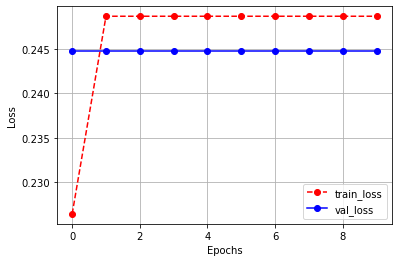

In [32]:
plt.plot(history.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], '-o', color = 'blue', label = 'val_loss')

plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [33]:
pred_Y = model.predict(test_X)

In [34]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("model - ACC :  ", np.round(acc * 100, 3))

ValueError: Unable to coerce to DataFrame, shape must be (550, 1): given (550, 10)

Text(0.5, 1.0, 'model')

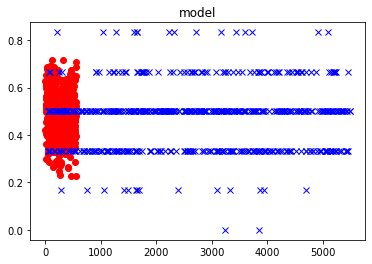

In [24]:
plt.plot(pred_Y[:], 'ro', label="pred_Y")
plt.plot(test_Y[:], 'bx', label="test_Y")

plt.title("model")


### Modeling (2)

In [25]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape= (input_cnt,))
])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.op)

In [27]:
wine['quality']

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64